
<img src="Uber_img.jpeg" alt="Drawing" style="width: 600px;"/>

#### Content
- **Geography:** USA, Sri Lanka and Pakistan

- **Time period:** January - December 2016

- **Unit of analysis:** Drives

- **Total Drives:** 1,155

- **Total Miles:** 12,204


### Dataset Description: 
 > **The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)**

**Describing Importing Libraries**

### Data Analysis

**PANDAS :**
    - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.
**NUMPY:**
       - It is the fundamental library of python, used to perform scientific computing. It provides high-performance multidimensional arrays and tools to deal with them. A numpy array is a grid of values (of the same type) that are indexed by a tuple of positive integers, numpy arrays are fast, easy to understand, and give users the right to perform calculations across arrays.
       
       
 ### Data Visualizations
 - Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions
       
**MATPLOTLIB**
- It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**
- It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

#### Import Libraries

In [1]:
# Analysis and Mathematical  Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# DateTime Libraries
import time, datetime

# Escape Warnings

import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis (EDA)

- **head()**Understand your data using the head() function to look at the first few rows.
- **shape()**Review the dimensions of your data with the shape property.
- **info()**To know the information aboutvthe data
- **Dtyes** Look at the data types for each attribute with the dtypes property.
- **describe**Review the distribution of your data with the describe() function.
- **Correlation** Calculate pairwise correlation between your variables using the corr() function.

## <font color='Blue' face='Cursive'> Importing DataSet </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [5]:
# Read the data of UBER 
# Here file is CSV i.e Comma Seperated Values
#df is a variable
#encoding = 'latin1'Fixing encoding errors in Pandas
#In fact, Pandas assumes that text is in UTF-8 format, because it is so common.
#In this case, as the filename suggests, the bytes for the text are in Latin 1 encoding.
#We can tell Pandas about this with the encoding= option: 

df = pd.read_csv("My Uber Drives - 2016.csv",encoding='latin1')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Here we can see that, Columns having special characters  we must remove special characters like '*'.**

> We do that using the below function.

In [6]:
df.columns = df.columns.str.replace("*","")

**Below you can see columns are clear in manner , there is no any special character**

In [8]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**Above information says Miles is float tye and rest of columns are objective**

In [10]:
df.shape

(1156, 7)

In [11]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 1156 rows and 7 columns are present in the Data Set


In [12]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## Handling Missing Values

- There are broadly divide into two ways to treat missing values
- 1. Delete --> Delete the missing values

- 2.impute --> 
>- imputting by a simple static: Replace the missing values by another value according to MEAN,MEDIAN,MODE
>- Predictive Techniques: Use statitical models such as K-NN,SVM etc to predict and replace missing values
> fillna


- otherwise deletion is often safer and recongineed . You may loose data but will not make false predections
- Caution : Always have backup of the orginal data .if you are deleting missing values


In [15]:
df.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


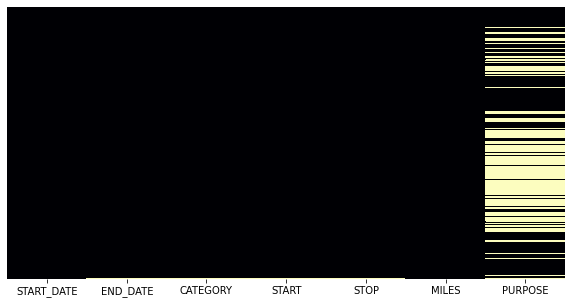

In [14]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

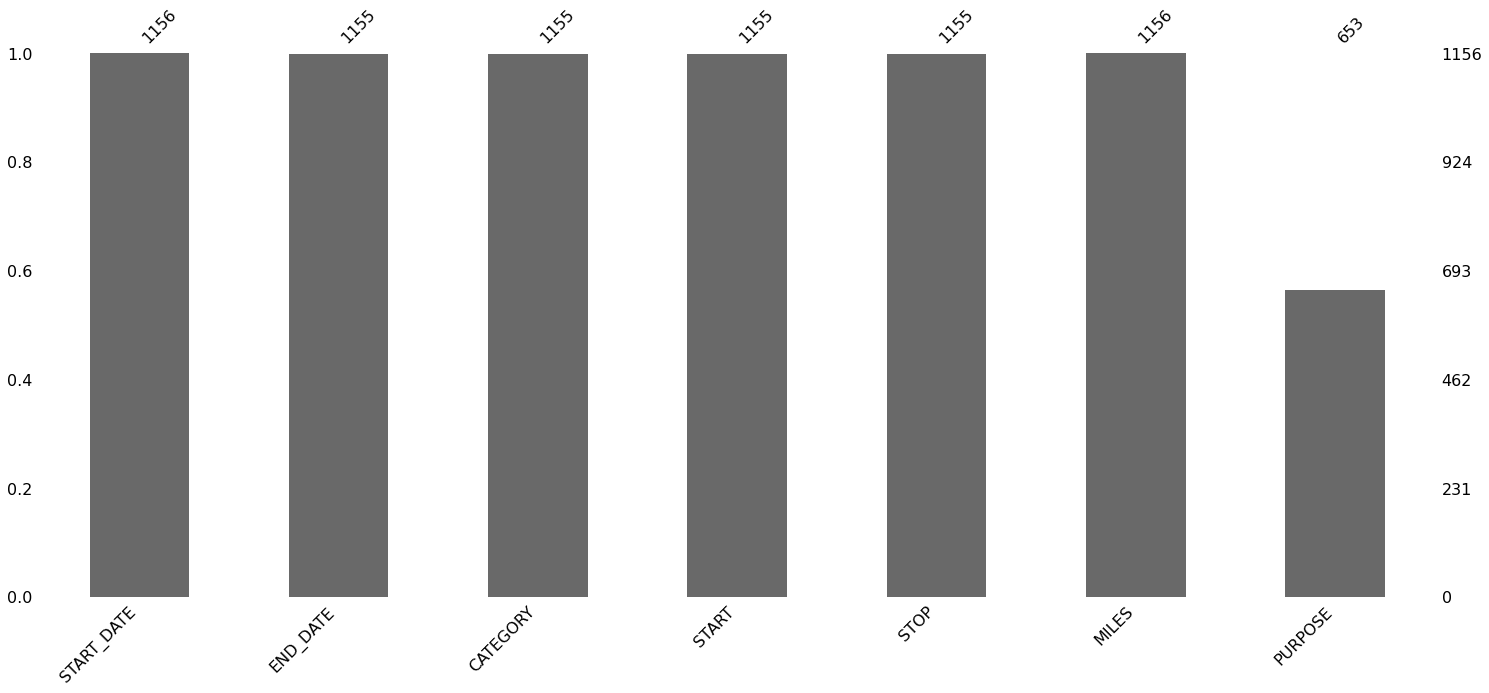

In [16]:
#visualizing the null values for each attribute


import missingno as msno

msno.bar(df)
plt.show()

In [18]:
df.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [19]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [20]:
df.tail(1)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [21]:
df.drop(index = 1155, axis = 0, inplace = True)

In [22]:
df.isnull().sum()


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [23]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

**Here we can see that 43% of null values present in the dataset in PURPOSE COLUMN.**

**Above Purpose column has 502 null values its a categorial**

In [33]:
df[["PURPOSE"]].value_counts()

PURPOSE        
Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
dtype: int64

In [31]:
# filling a null values using fillna() 
#ffill means forwadrd fill   (  non-null values forward)
df["PURPOSE"].fillna(method='ffill', inplace = True) 

In [32]:
df.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64


### Lets calculate the duration, as there might be some relation of it to PURPOSE of Cab ride.

In [34]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


**Only Numerical and float data can be describe. Here we can see the mean, median , mode, standard deviation**

#### Missingo :

  >          Missingno is a library for visualizing incompleteness in a dataset, it works on top of Matplotlib
         and Seaborn, and it’s effortless to use
           

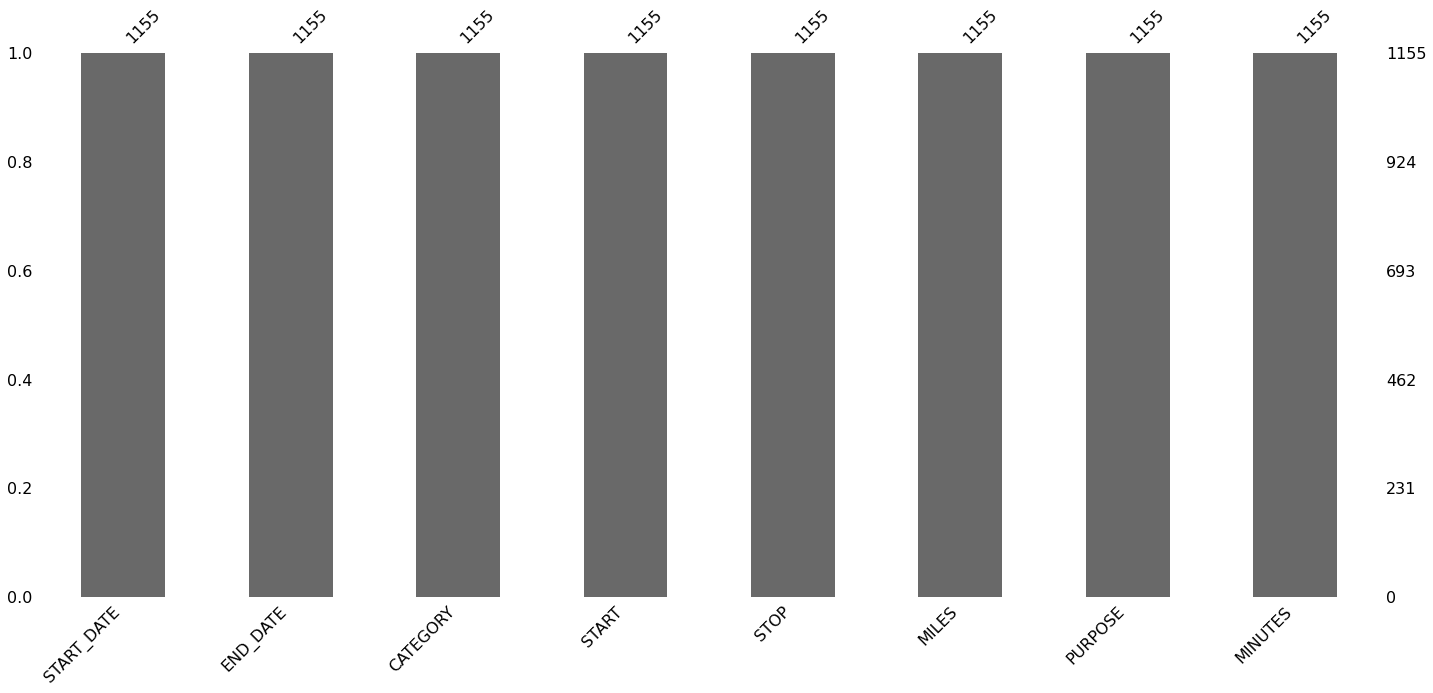

In [209]:
import missingno as msno
msno.bar(df)
plt.show()

**Now you can see there is no missing values visually**

#### Lets Do Preprocess on cloumns

In [35]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

#### Start Date and End Date 
> Since the Date and Time  of the start_date and end_date are of data type object we are converting it to datetime

In [36]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


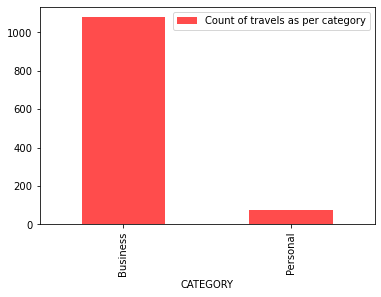

In [212]:

Category =pd.crosstab(index=df['CATEGORY'],columns='Count of travels as per category')

Category.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
Category


### Which are the places have HIGHEST START points

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64


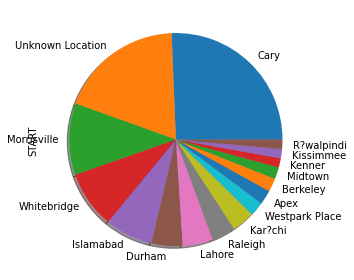

In [38]:
Start_point = df.START.value_counts()
Start_point
print(Start_point[Start_point > 10])


Start_point[Start_point > 10].plot(kind = "pie", shadow=True, startangle=0)
plt.tight_layout()
plt.show()


**Above pie chart can understand that, Cary, Unknown Location Morrisville ,Whitebridge are highest satrting point**

### Which are the places are having LOWEST START point

In [39]:
Start_point = df.START.value_counts()
Start_point
Start_point[Start_point <=  10]

New Orleans       10
Emeryville        10
Downtown           9
Edgehill Farms     8
Central            8
                  ..
Florence           1
Ridgeland          1
Daytona Beach      1
Sky Lake           1
Gampaha            1
Name: START, Length: 161, dtype: int64



**Above are start_pont are low number of starting points**

### Which are the places are having HIGHEST STOP point

In [40]:
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point >=  10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Edgehill Farms       10
New Orleans          10
Kenner               10
Name: STOP, dtype: int64

**Note**

> The places where Cary , Unknown Loccation, Morrisville , Whitebridge and next to Islamabad are highest stop points.
> Highest stop points are not same as Highest end points , there is a bit difference

### Which are the places are having LOWEST STOP point

In [41]:
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point <=  10]

Edgehill Farms       10
New Orleans          10
Kenner               10
Emeryville            9
Central               9
                     ..
Daytona Beach         1
Sand Lake Commons     1
Sky Lake              1
Vista East            1
Ilukwatta             1
Name: STOP, Length: 173, dtype: int64

> **Above are the lowest stop points**


### MILES MOST

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64


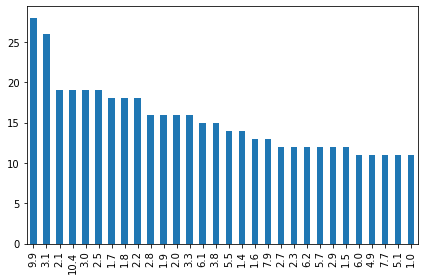

In [42]:
Miles = df.MILES.value_counts()
Miles
print(Miles[Miles> 10])


Miles[Miles> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()


col_0,Count of Miles
MILES,
False,840
True,315


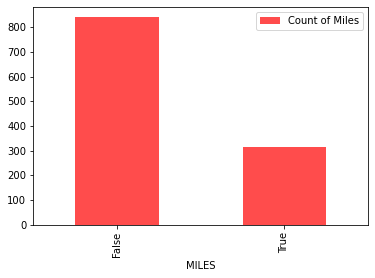

In [218]:


Miles =pd.crosstab(index=df["MILES"]>10,columns='Count of Miles')

Miles.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
Miles


**Greater than 10 miles**

In [43]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


### Purpose of most cab rides

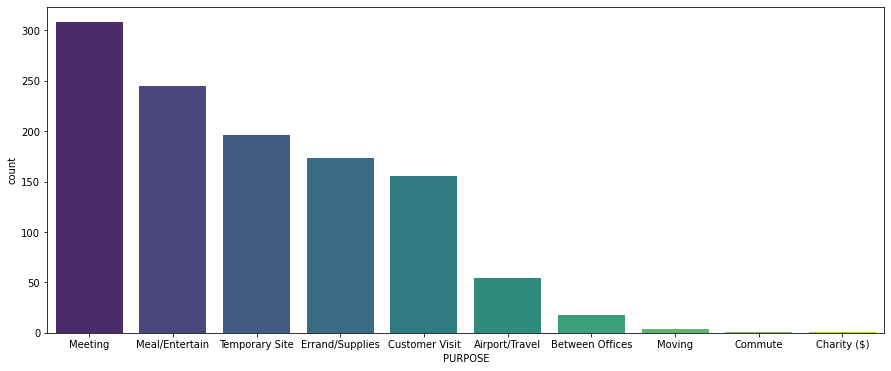

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

**Grouping Purpose by Miles to see if we can get any pattern.**

In [44]:
# For future Analysis


# Lets calculate the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00


In [45]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


## Analysis and Visualization

**Grouping Purpose by Miles to see if we can get any pattern.**

In [46]:
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1), 
              'MIN' : df.groupby(['PURPOSE'])['MILES'].min(), 
              'MAX' : df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


###  BOX Plot for better Visualization
> BOX plot of MILES and MINUTES split by PURPOSE

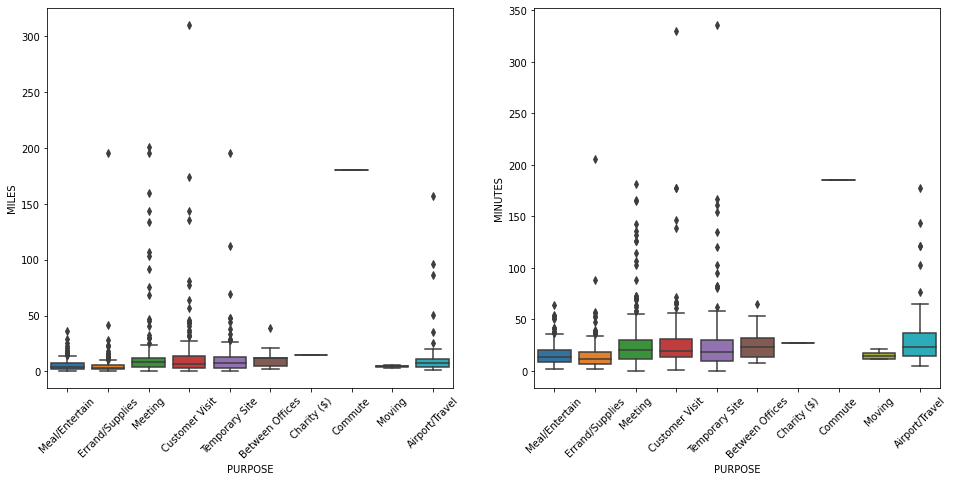

In [47]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

**Boxplots of MILES and MINUTES based on PURPOSE without outliers**

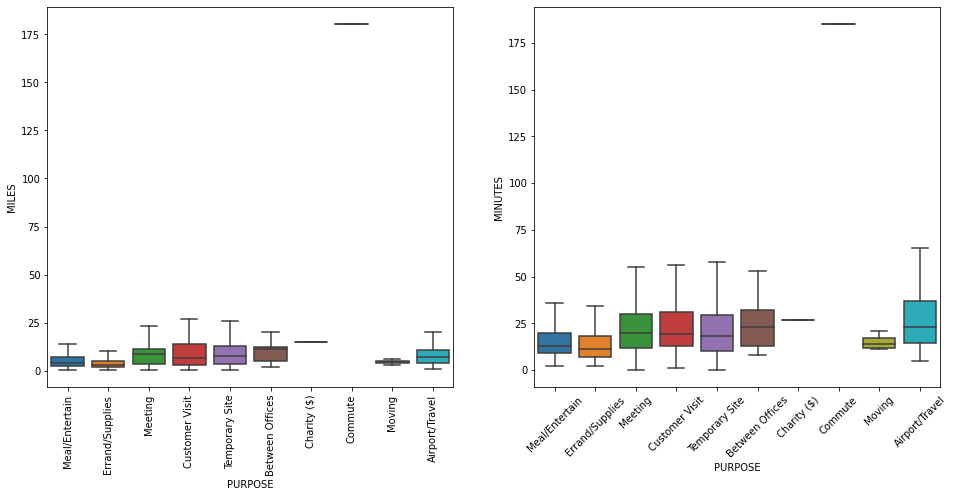

In [50]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

**Checking how many are the ROUND TRIPS i.e. start and stop points are same**

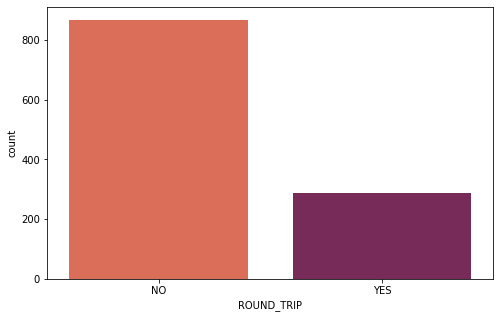

In [52]:
# For this purpose, we need to make a function
plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP'] = df.apply(round, axis=1)

sns.countplot(df['ROUND_TRIP'], order=df['ROUND_TRIP'].value_counts().index, palette='rocket_r')
plt.show()


**There are very less number of ROUND Trips.** so(yes is low numb i.e round trip)

### Entering Month Name and evaluating Frequency of Trip in each Month

In [54]:
-df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [55]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)



# MAP FUNCTION : Its a build in function
#       1. This function is used to apply a function to all the elements of a sequence(list,tuple.strings) 


In [57]:
df['MONTH'].value_counts()

Dec      146
Aug      133
Nov      122
Feb      115
Mar      113
July     112
June     108
Oct      106
Jan       61
April     54
May       49
Sep       36
Name: MONTH, dtype: int64

**When are cab rides more popular (frequently used)?**

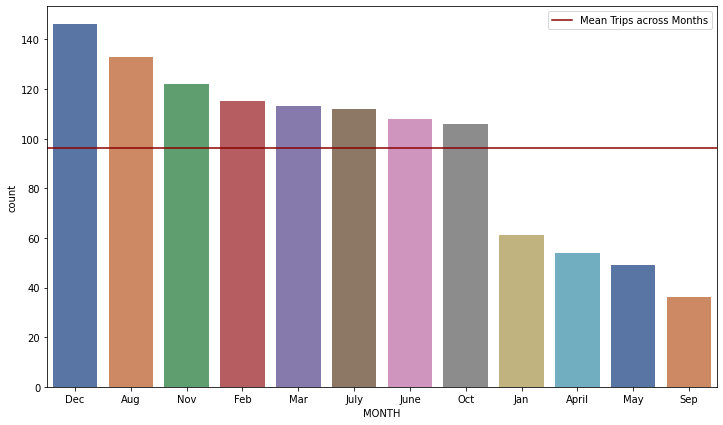

In [58]:
plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'], order=df['MONTH'].value_counts().index, palette='deep')
plt.axhline(df['MONTH'].value_counts().mean(),linestyle='-', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

**Round Trip against Months**

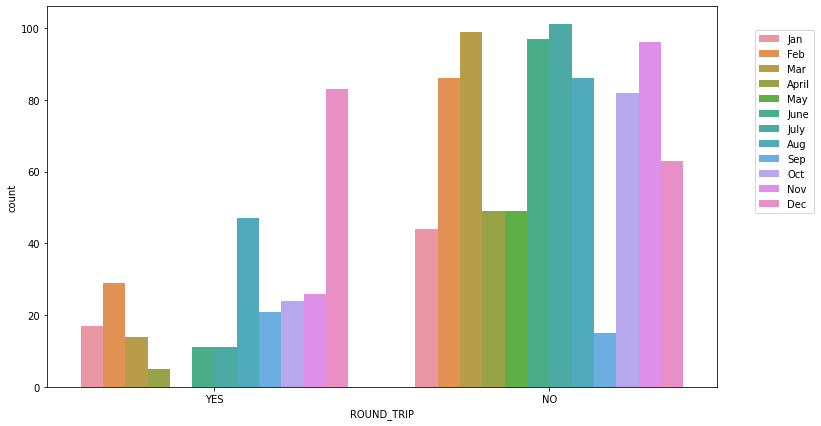

In [59]:
plt.figure(figsize=(12,7))
a=sns.countplot(df['ROUND_TRIP'],hue=df['MONTH'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

###  How does the PURPOSE of Cab ride vary with time and distance?

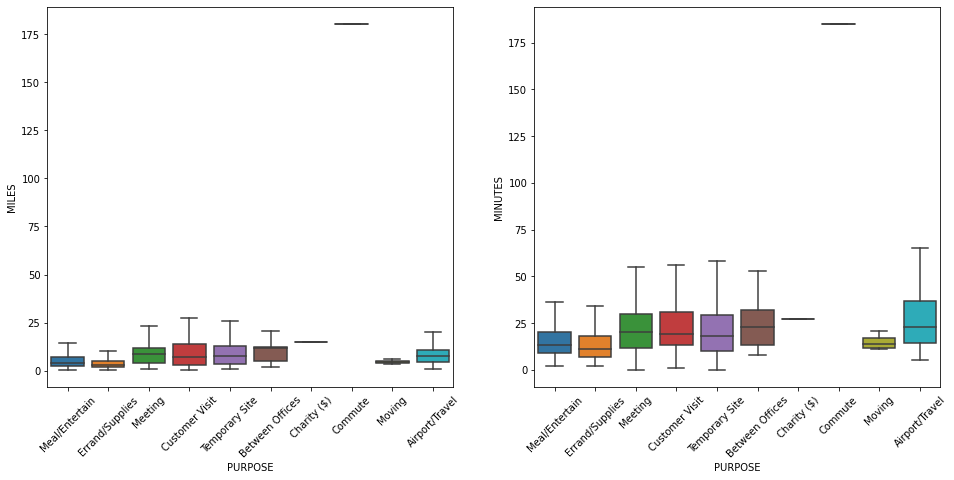

In [60]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES, showfliers = False)
plt.xticks(rotation = 45);

#### Is the distance proportional to the duration?

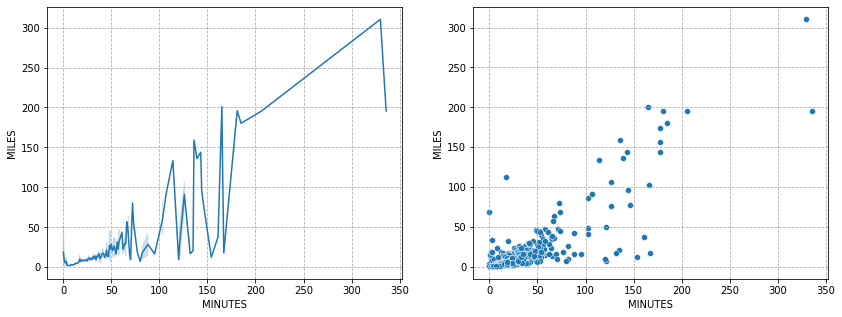

In [61]:
#Plots of MILES with respect to MINUTES



plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

**we see that our conventional logic, that distance is proportional to time, is challenged as some cab rides took more time for less distance.**

(array([970., 142.,  13.,  11.,  11.,   5.,   1.,   0.,   0.,   2.]),
 array([  0. ,  33.6,  67.2, 100.8, 134.4, 168. , 201.6, 235.2, 268.8,
        302.4, 336. ]),
 <BarContainer object of 10 artists>)

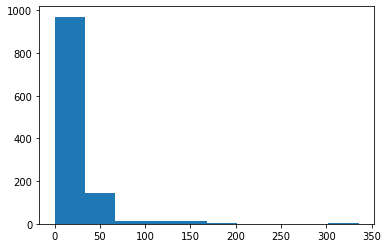

In [62]:
plt.hist(df.MINUTES)

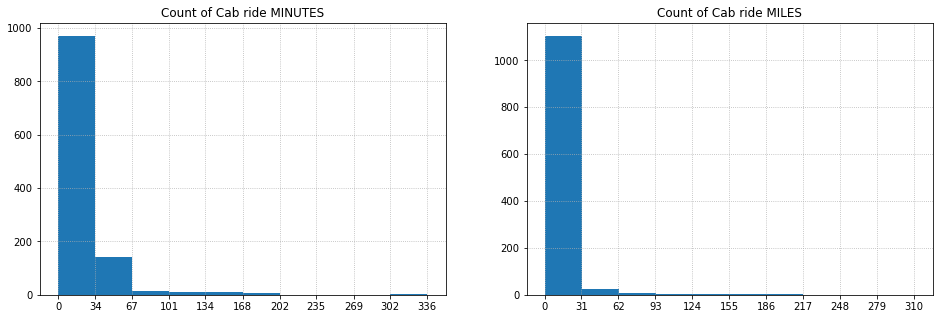

In [72]:
# cab rides took more time for less distance.

plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MILES");

### Distribution of Cab rides based on Category


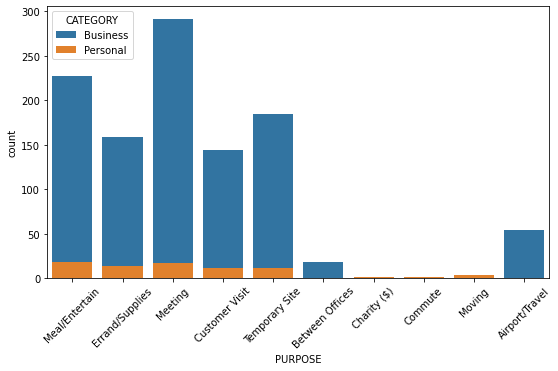

In [64]:
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

**The above plot makes clear distinction on the Purpose of Business rides and Personal rides.
This may give insight to cab aggregators to decide which sector to introduce new cabs in.**

### Where do customers most frequently take cabs?
> **Frequency of Cab Rides START**

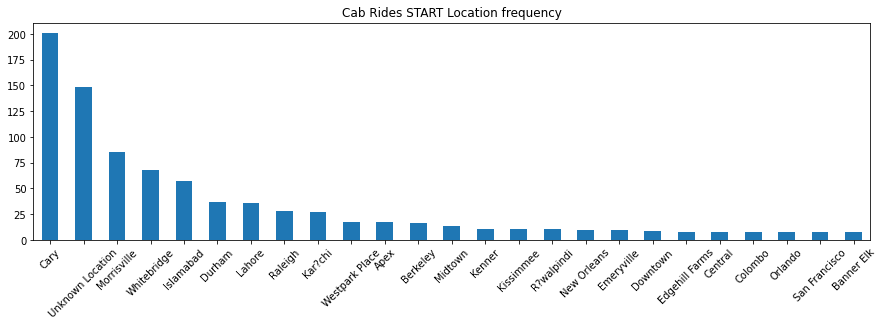

In [65]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

## Frequency of Cab Rides STOP

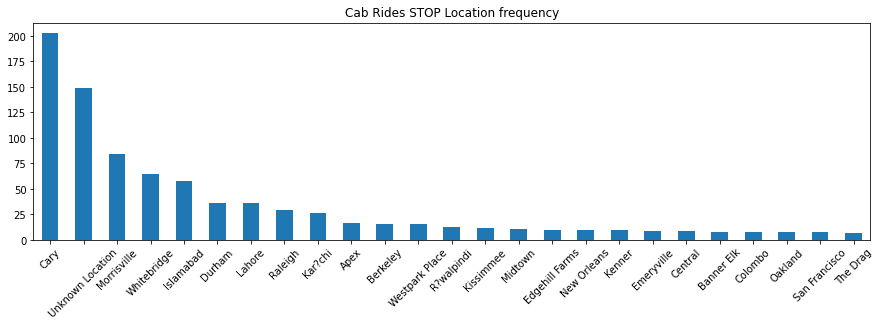

In [66]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);

### How many miles was earned per category and purpose ?

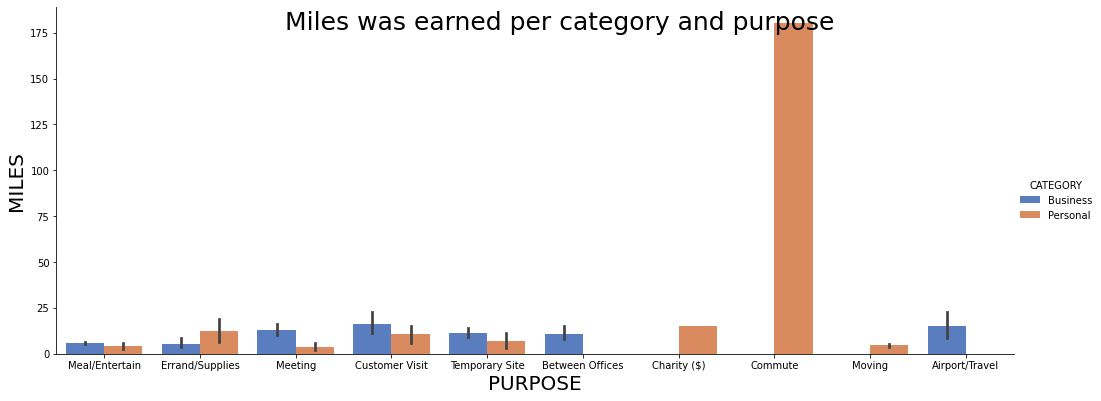

In [67]:
g = sns.factorplot(x="PURPOSE", y="MILES", hue="CATEGORY", data=df,
                   size=15, kind="bar", palette="muted")
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer; private: commute and charity 
g.fig.suptitle('Miles was earned per category and purpose', fontsize= 25)
g.fig.set_size_inches(15, 5)
g.set_xlabels('PURPOSE', fontsize= 20)
g.set_ylabels('MILES', fontsize= 20)

# Conclusion

> - Most of the cab rides are within a distance of 31 miles taking about 34 minutes.
> - Business Cab rides are not only more in volume, but also in distance travelled.
> - Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.
> - Cab traffic is mostly concentrated in 5 cities or localities.
> - Ac seasonal pattern of cab ride volume exists, which is highest on December.